In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [25]:
df=pd.read_csv("../datasets/catalog.csv")
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1693 non-null   int64  
 1   date                  1690 non-null   object 
 2   time                  629 non-null    object 
 3   continent_code        164 non-null    object 
 4   country_name          1693 non-null   object 
 5   country_code          1693 non-null   object 
 6   state/province        1692 non-null   object 
 7   population            1693 non-null   int64  
 8   city/town             1689 non-null   object 
 9   distance              1692 non-null   float64
 10  location_description  551 non-null    object 
 11  latitude              1692 non-null   float64
 12  longitude             1692 non-null   float64
 13  geolocation           1692 non-null   object 
 14  hazard_type           1693 non-null   object 
 15  landslide_type       

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN
5,64,4/20/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,0.23715,...,"(37.481400000000001, -82.518600000000006)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Applalachain news-express,http://www.news-expressky.com/articles/2007/04...
6,67,4/24/07,NaN,NaN,United States,US,South Dakota,2540,Dakota Dunes,2.48033,...,"(42.494100000000003, -96.457599999999999)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Sioux City Journnal,http://www.siouxcityjournal.com/articles/2007/...
7,77,5/21/07,NaN,SA,Colombia,CO,Risaralda,440118,Pereira,0.62022,...,"(4.8080999999999996, -75.694100000000006)",Landslide,Mudslide,Large,Rain,NaN,NaN,13.0,Reuters - AlertNet.org,http://www.reuters.com/news/video/videoStory?v...
8,105,6/27/07,NaN,SA,Ecuador,EC,Zamora-Chinchipe,15276,Zamora,0.47714,...,"(-4.0650000000000004, -78.950999999999993)",Landslide,Landslide,Medium,Downpour,NaN,NaN,NaN,Red Cross - Field reports,https://www-secure.ifrc.org/dmis/prepare/view_...
9,106,6/27/07,NaN,SA,Ecuador,EC,Loja,117796,Loja,0.35649,...,"(-3.99, -79.204999999999998)",Landslide,Landslide,Medium,Downpour,NaN,NaN,NaN,Red Cross - Field reports,https://www-secure.ifrc.org/dmis/prepare/view_...


In [26]:
df.shape

(1693, 23)

In [27]:
df['landslide_type'].value_counts()

Landslide             866
Mudslide              635
Rockfall               70
Complex                48
Debris flow            38
Other                  14
Riverbank collapse      5
Creep                   5
mudslide                4
Lahar                   2
Snow avalanche          2
landslide               1
Unknown                 1
Rockslide               1
Name: landslide_type, dtype: int64

In [28]:
df.sample(10)

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
655,3391,4/21/11,NaN,NaN,United States,US,Kentucky,3035,Wilder,1.24385,...,"(39.0456, -84.4833)",Landslide,Landslide,Medium,Downpour,NaN,NaN,0.0,NaN,http://www.kypost.com/dpp/news/local_news/high...
1385,6698,9/19/14,NaN,NaN,Costa Rica,CR,San José,34877,San Isidro,10.73752,...,"(9.4359000000000002, -83.630300000000005)",Landslide,Landslide,Medium,Rain,NaN,0.0,0.0,Canal 14,http://www.tvsur.co.cr/noticias/general/desliz...
1108,5440,9/2/13,Night,NaN,United States,US,Idaho,7960,Hailey,2.19542,...,"(43.509700000000002, -114.33880000000001)",Landslide,Mudslide,Small,Downpour,NaN,NaN,0.0,www.kmvt.com,http://www.kmvt.com/news/local/Wood-River-Anim...
920,4637,11/28/12,NaN,SA,Colombia,CO,Norte de Santander,2080,San Calixto,11.19714,...,"(8.4682999999999993, -73.284300000000002)",Landslide,Landslide,Large,Rain,NaN,NaN,NaN,NaN,http://latino.foxnews.com/latino/news/2012/11/...
594,3175,3/6/11,NaN,NaN,United States,US,North Carolina,1241,Blowing Rock,13.11943,...,"(36.037799999999997, -81.594899999999996)",Landslide,Mudslide,Medium,Downpour,NaN,NaN,0.0,NaN,http://www2.hickoryrecord.com/news/2011/mar/10...
257,1472,2/5/10,NaN,NaN,Mexico,MX,Michoacán,4943,Mineral de Angangueo,1.69508,...,"(19.616700000000002, -100.3)",Landslide,Mudslide,Medium,Downpour,NaN,NaN,3.0,NaN,http://www.aajtv.com/news/World/158635_detail....
487,2658,10/30/10,NaN,NaN,Saint Lucia,LC,Laborie,1131,Laborie,2.74715,...,"(13.7705, -60.969000000000001)",Landslide,Landslide,Medium,Tropical cyclone,Hurricane Tomas,NaN,0.0,NaN,NaN
1410,6809,3/2/15,Morning,NaN,United States,US,Kentucky,1706,Coal Run Village,16.40897,...,"(37.423299999999998, -82.705799999999996)",Landslide,Mudslide,Small,Snowfall snowmelt,NaN,0.0,0.0,WKYT,http://www.wkyt.com/wymt/home/headlines/Crews-...
299,1746,4/12/10,NaN,NaN,Dominica,DM,Saint Patrick,2608,Berekua,5.61495,...,"(15.255599999999999, -61.2697)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,NaN,http://www.dominicacentral.com/general/communi...
1561,7348,7/19/15,NaN,NaN,United States,US,California,193365,Moreno Valley,5.33395,...,"(33.980499999999999, -117.2564)",Landslide,Debris flow,Medium,Downpour,NaN,0.0,0.0,NBC,http://www.nbclosangeles.com/on-air/as-seen-on...


In [45]:
df.drop(["source_name","source_link"],axis=1,inplace=True)

In [46]:
df['date'].isnull().sum()

3

In [47]:
df['date_parsed']=pd.to_datetime(df['date'],format="%m/%d/%y")
df['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [48]:
day_of_month_landslides = df['date_parsed'].dt.day

In [49]:
day_of_month_landslides

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_parsed, Length: 1693, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed'>

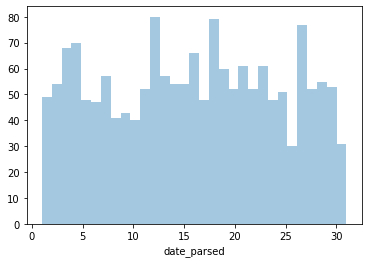

In [50]:
day_of_month_landslides = day_of_month_landslides.dropna()# remove na's
sns.distplot(day_of_month_landslides, kde=False, bins=31)# plot the day of the month

In [51]:
missing_values_count = df.isnull().sum()
missing_values_count

id                         0
date                       3
time                    1064
continent_code          1529
country_name               0
country_code               0
state/province             1
population                 0
city/town                  4
distance                   1
location_description    1142
latitude                   1
longitude                  1
geolocation                1
hazard_type                0
landslide_type             1
landslide_size             1
trigger                    2
storm_name              1561
injuries                1178
fatalities               247
date_parsed                3
dtype: int64

In [52]:
total_missing = missing_values_count.sum()
total_missing

6740

In [53]:
total_cells = np.product(df.shape)
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

18.095902915749342
